# Templete notebook

This is a basic template notbook. It contains all the things you will need in order to jigsaw togeather your SDE and Gillespie algorithm.

It is assumed  you've done scripting before, but this notebook should help you out with scripting in python in particular.

Things to remember of python:
- Python uses "y=\[1, 2, 3\]" notation for list, not for mathematical vectors. Entries in list can have different formats and lenghts.
- If you are more familiar with vectors, as done in MATLAB for example, then use numpy arrays instead: y = np.array(\[1,2,3\]). 
- Python has a larger audience and uses, so libraries need to be defined at the begging. Main ones we will use:
    - matplotlip.pyplot : For plotting. It is usually imported as "plt", so each function you use from this library you need to type "plt.funtion_name" instead to just "function_name"
    - numpy: Pythons Numerics package For all the basic math we need. Linear algebra and basic stats functions are here. It's usually imporated as "np".
        - Within numpy, we will using the random sublibrary constantly, so we recomend to import it separatelly as well, so we avoid having to type np.random.function_name each time.
- Python doesn't use "being" and "end" notation, but isntead it read the functions using the inline format, for a line to depend on a line above type "tab"
- Python starsts inedex at 0 (not 1 like Matlab). So to acces the first entry you use y\[0\]
- To acces the last entry of and array/list use the index -1: y\[-1\]. It actually works for any n, and gives you the nth-last entry: y\[-n\].


__TO SIMPLYFY things: we will ALWAYS use np.arrays when thinking of vectors.__
    


In [13]:
## It is nice practice to import all your libraries at the beggining of your code
# We'll import numpy (Pythons Numerics package) and matplotlib (ploting package)
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


## Simulating random numbers of uniform, normal and exponential distribution

In [16]:
## Basic generation of uniform random numbers between 0 and 1:  
print("Uniform random numbers in the unit interval")
## To generate a single random number between 0 and 1:
x = random.rand() 
print("A single random number:")
print(x) 
## Or to generate an array of random numbers between 0 and 1:
x = random.rand(3, 5)
print("A 3 by 5 array or random numbers:")
print(x) 

Uniform random numbers in the unit interval
A single random number:
0.9888610889064947
A 3 by 5 array or random numbers:
[[0.74816565 0.28044399 0.78927933 0.10322601 0.44789353]
 [0.9085955  0.29361415 0.28777534 0.13002857 0.01936696]
 [0.67883553 0.21162812 0.26554666 0.49157316 0.05336255]]


In [18]:
print("Normal random numbers")
## To generate a standard normally distributed random variable (mean 0, variance 1)
N = random.randn() 
print("A single random number from a N(0,1):")
print(N)

## You can convert a standard normal to a Normal with mean= meanVal and variance = Variance using the following transformation:
meanVal = 1
Variance = 2.5
N = meanVal + np.sqrt(Variance) * random.randn()
print("A single random number from a N(mean =1, var = 2.5)")
print(N);  

N = meanVal + np.sqrt(Variance) * random.randn(5)
print("5 random numbers from a N(mean =1, var = 2.5)")
print(N); 

Normal random numbers
A single random number from a N(0,1):
1.6598021771098705
A single random number from a N(mean =1, var = 2.5)
2.173274835926053
5 random numbers from a N(mean =1, var = 2.5)
[ 0.69668136 -0.40346462 -0.18136099  3.67600569  1.08033411]


In [19]:
print("Exponential random numbers")
## To generate an exponentially distributed random variable with mean 4.
x= random.exponential(4)  
print("A single exponential random number with mean 4")
print(x)

x= random.exponential(3,[8,2])  ##Creates lots of exponentially distributed random variable with mean 3.
print("A 8 by 2 array of exponential random numbers with mean 3")
print(x)

## You'll need these for Gillespie's algorithm

Exponential random numbers
A single exponential random number with mean 4
4.360132523076675
A 8 by 2 array of exponential random numbers with mean 3
[[2.17013334 8.6792431 ]
 [2.64969265 7.01158909]
 [0.44367241 0.44994536]
 [4.94128365 1.52088349]
 [0.5422435  7.87286122]
 [1.28205501 4.16864418]
 [3.88385946 6.44460281]
 [2.93188418 4.17021366]]


## Fixing the seed of the random generator

Python, as well as other programing languages, uses dynamic seeds to generate different random numbers each time you call a function. This is what we want usually, BUT for reproducibility you want to control what seed you use.

For that you'll need to add to your code: "random.seed(1)" (or instead of 1, any number to define your seed). You can define the seed of each of your simulations by changing the integer number inside the parenthesis.

_You can uncomment the next cell if you want to fix the seed_


In [ ]:
## For reproducibility you can fix the seed of your random generator:
# random.seed(1)
## BUT make sure you don't fix your seed when you run multiple simulations or you'll get exactly the same simulation each time

## Defining matrix

Remember we will use only np.arrays, not python list.

Also remember intexing in python starst on 0

In [40]:
# Matrices are defined as:
ActionMatrix = np.array([[-1,1,0],[0,-1,1],[-1,-1,27],[1,0,0],[0,-1,0]])
print(ActionMatrix)
# You can access  the second row, similar for columns, using: 
a = ActionMatrix[1,:]
# Or access the 3 by 3 entry of the matrix:
b = ActionMatrix[2,2]
print("Second row:")
print(a)
print("Entry (3,3):")
print(b)


[[-1  1  0]
 [ 0 -1  1]
 [-1 -1 27]
 [ 1  0  0]
 [ 0 -1  0]]
Second row:
[ 0 -1  1]
Entry (3,3):
27


## Formating loops and if statements

Let's get our hands on some if/else and for loops

Remeber that you need to tab the statements that are within the if statement or the loops in order for python to understand them (since python doen't have begging/end explicit notation)

In [20]:
## Simple if statement:
a = 200
b = 56
if b > a:
    print("b is greater than a")
else:
    print("a is greater or equal than b")
## In python, "Tabs" are used as part of the program.
# The fact that "print" is indented helps define the "scope" of the program.
## Many other programming languages would use "{" and "}" to define scope instead. These curly brackets are not needed here.

## "elif" is python's version of "else if".
if b > a:
    print("b is greater than a")
elif a>b:
    print("a is greater than b")
else:
    print("a and b are the same size")

## An example with a random number: 
if random.rand() > 0.5:
    print("Heads")
else:
    print("Tails")


a is greater or equal than b
a is greater than b
Tails


In [ ]:
## Loops allow you to tell the computer to repeat an action many many times. 
## For both SDEs and Gillespie you are likely to have at least one "Main loop",
## and possibly several smaller ones.

i = 1
while i <= 5:
    print(i)
    i += 1
print("The loop is done")

## Once again "Tabs" are a critical part of how python functions. 

In [34]:
## You can use boolean statements (true/false) to calculate statements.  
## In this example we want to randomly select from 1 to If you want to select an item from a weighted list, then use

weights=np.array([10,10,1,60,19])
weights_cumsum = np.cumsum(weights)
irand = random.rand()

## Long way
SelectIndex_long = 0
for i in range(len(weights)): ## range(n) gives integer from 0 to n-1, len gives the length of a list/array
    if irand*weights_cumsum[-1]>weights_cumsum[i]: # The last entry of the cumsum = sum(weights)
        SelectIndex_long += 1     
print("Index calculated the long way:")
print(SelectIndex_long)
    
# An equivalent way using boolean indexing:
SelectIndex = np.sum(irand*np.sum(weights)>weights_cumsum)
print("Index calculated the short way:")
print(SelectIndex)

##This example will select index 4 60% of the time, and index 3 1% of the time. 
#Rates don't have to sum to one, rescalling is implict


Index calculated the long way:
3
Index calculated the short way:
3


## Example: the random walk

Lastly, let's simulate a random walk. This is not the standard random walk, but a biased random walk. It moves up 55% of the time, and down 45%.

Alastair uses more while loops, but Alejandra uses more for loops. They are equivalent. We give you examples of both for ilustartive purpuses

While loop done
[ 1.  0.  1.  2.  1.  0. -1. -2. -1.  0. -1. -2. -3. -4. -5. -6. -5. -4.
 -5. -4. -5. -6. -5. -6. -5. -4. -3. -2. -1. -2. -3. -2. -1.  0.  1.  0.
  1.  0. -1. -2. -3. -4. -3. -2. -3.]


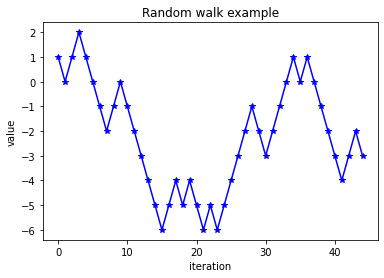

In [43]:
## The random walk with a while loop

NumberOfSteps = 45
randomNumbers = random.rand(NumberOfSteps)

currentSteps=0;
currentPosition=0;
PositionArray= np.zeros(NumberOfSteps)
stepsArray=np.zeros(NumberOfSteps)

while currentSteps<NumberOfSteps:
    stepsArray[currentSteps]=currentSteps;
    if randomNumbers[currentSteps]<0.55: ## Here is where it moves up 55% of the time, and down 45%
        currentPosition=currentPosition+1;
    else:
        currentPosition=currentPosition-1;
    PositionArray[currentSteps]=currentPosition;
    currentSteps=currentSteps+1;
    
print("While loop done");
print(PositionArray);

## Once you've created a random walk (or other algorithm) you might want to display it
plt.figure()
plt.title('Random walk example')
plt.plot(stepsArray, PositionArray, '*-b')
plt.xlabel("iteration")
plt.ylabel("value")
plt.show()


While loop done
[ 1.  0.  1.  2.  1.  0. -1. -2. -1.  0. -1. -2. -3. -4. -5. -6. -5. -4.
 -5. -4. -5. -6. -5. -6. -5. -4. -3. -2. -1. -2. -3. -2. -1.  0.  1.  0.
  1.  0. -1. -2. -3. -4. -3. -2. -3.]


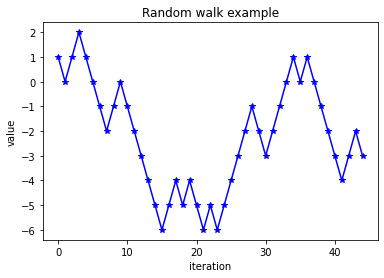

In [45]:
## The random walk with a while loop
NumberOfSteps = 45
randomNumbers = random.rand(NumberOfSteps)

currentSteps = 0
currentPosition = 0
PositionArray = np.zeros(NumberOfSteps)
stepsArray = np.arange(0, NumberOfSteps, 1) # This creates a vector with entries 0,0+1,...,n, where n is the last number before NumberofSteps

while currentSteps < NumberOfSteps:
    if randomNumbers[currentSteps] < 0.55: ## Here is where it moves up 55% of the time, and down 45%
        currentPosition = currentPosition + 1
    else:
        currentPosition = currentPosition - 1
    PositionArray[currentSteps] = currentPosition
    currentSteps += 1
    
print("While loop done")
print(PositionArray)

## Once you've created a random walk (or other algorithm) you might want to display it
plt.figure()
plt.title('Random walk example')
plt.plot(stepsArray, PositionArray, '*-b')
plt.xlabel("iteration")
plt.ylabel("value")
plt.show()

For loop done
[ 1.  0.  1.  2.  1.  0. -1. -2. -1.  0. -1. -2. -3. -4. -5. -6. -5. -4.
 -5. -4. -5. -6. -5. -6. -5. -4. -3. -2. -1. -2. -3. -2. -1.  0.  1.  0.
  1.  0. -1. -2. -3. -4. -3. -2. -3.]


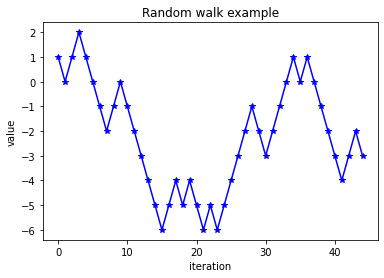

In [59]:
## Now the same but with for loop notation. 
## Note that we need to restart the random walk to start at zero, but we kept the same random numbers so we can compare to the while loop solution.
currentPosition_for = 0
for currentSteps in range(NumberOfSteps):
    if randomNumbers[currentSteps] < 0.55: ## Here is where it moves up 55% of the time, and down 45%
        currentPosition_for += 1
    else:
        currentPosition_for -= 1
    PositionArray[currentSteps] = currentPosition_for
    
    
print("For loop done")
print(PositionArray)

## Once you've created a random walk (or other algorithm) you might want to display it
plt.figure()
plt.title('Random walk example')
plt.plot(stepsArray, PositionArray, '*-b')
plt.xlabel("iteration")
plt.ylabel("value")
plt.show()